In [1]:
# Load all helper function
%run -i '../util/helper.py'

In [2]:
# importing the dataset
df  = pd.read_csv('../Dataset/brazilian_ecommerce.csv')
geo = pd.read_csv("../Dataset/original/olist_geolocation_dataset.csv").drop(['geolocation_city', 'geolocation_state'], axis = 1)

In [3]:
# Compute the avg geo location given a zip code
geo = geo.groupby('geolocation_zip_code_prefix').mean()
geo = geo.reindex(np.arange(geo.index.min(), geo.index.max() + 1)).interpolate(method = 'nearest')
geo

,geolocation_lat,geolocation_lng
geolocation_zip_code_prefix,,
1001,-23.55019,-46.63402
1002,-23.54815,-46.63498
1003,-23.54899,-46.63573
1004,-23.54980,-46.63476
1005,-23.54946,-46.63673
...,...,...
99986,-28.32959,-51.76936
99987,-28.32959,-51.76936
99988,-28.32959,-51.76936


In [4]:
# Join the geo info to the table
df = pd.merge(df, geo, left_on = 'customer_zip_code_prefix', right_index = True).drop(['customer_zip_code_prefix'], axis = 1)
df = pd.merge(df, geo, left_on = 'seller_zip_code_prefix', right_index = True).drop(['seller_zip_code_prefix'], axis = 1)
df

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,...,customer_state,seller_city,seller_state,product_category_name_english,sale,is_delayed,geolocation_lat_x,geolocation_lng_x,geolocation_lat_y,geolocation_lng_y
0,0,0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,...,SP,maua,SP,housewares,29.99000,False,-23.57698,-46.58716,-23.68073,-46.44424
1,1,1,1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,...,SP,maua,SP,housewares,29.99000,False,-23.57698,-46.58716,-23.68073,-46.44424
2,2,2,2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,...,SP,maua,SP,housewares,29.99000,False,-23.57698,-46.58716,-23.68073,-46.44424
3,3,3,3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,...,SP,maua,SP,housewares,29.99000,False,-23.56463,-46.53427,-23.68073,-46.44424
4,4,4,4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,...,SP,maua,SP,housewares,29.99000,False,-23.60046,-46.65532,-23.68073,-46.44424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86554,86554,86554,86554,0d10abc3bc3707c914cf5197ed2eb31e,c36b6c328033cca3190e0e45ee61b010,delivered,2017-08-19 09:10:45,2017-08-19 09:25:11,2017-08-23 17:17:44,2017-09-04 20:43:47,...,BA,ribeirao das neves,MG,NaN,23.50000,False,-12.69013,-38.33172,-19.81443,-44.02627
86555,86555,86555,86555,0d10abc3bc3707c914cf5197ed2eb31e,c36b6c328033cca3190e0e45ee61b010,delivered,2017-08-19 09:10:45,2017-08-19 09:25:11,2017-08-23 17:17:44,2017-09-04 20:43:47,...,BA,ribeirao das neves,MG,NaN,47.00000,False,-12.69013,-38.33172,-19.81443,-44.02627
86556,86556,86556,86556,0d10abc3bc3707c914cf5197ed2eb31e,c36b6c328033cca3190e0e45ee61b010,delivered,2017-08-19 09:10:45,2017-08-19 09:25:11,2017-08-23 17:17:44,2017-09-04 20:43:47,...,BA,ribeirao das neves,MG,NaN,70.50000,False,-12.69013,-38.33172,-19.81443,-44.02627
86661,86661,86661,86661,a966152e4fc6b7e1891aadd4406c7c4a,d339a723a489601e585d4f733a94bfe4,delivered,2018-04-02 21:10:31,2018-04-04 03:08:55,2018-04-11 02:32:39,2018-04-13 20:06:34,...,SP,curitiba,PR,NaN,48.00000,False,-23.61394,-46.67897,-25.41206,-49.35639


In [5]:
df['distance'] = df.apply(lambda x: distance.distance((x['geolocation_lat_x'], x['geolocation_lng_x']),
                                                          (x['geolocation_lat_y'], x['geolocation_lng_y'])).km, axis=1)
df = df.drop(['geolocation_lat_x', 'geolocation_lng_x', 'geolocation_lat_y', 'geolocation_lng_y'], axis = 1)
df

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,...,product_width_cm,customer_unique_id,customer_city,customer_state,seller_city,seller_state,product_category_name_english,sale,is_delayed,distance
0,0,0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,...,13.00000,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,maua,SP,housewares,29.99000,False,18.56663
1,1,1,1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,...,13.00000,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,maua,SP,housewares,29.99000,False,18.56663
2,2,2,2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,...,13.00000,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,maua,SP,housewares,29.99000,False,18.56663
3,3,3,3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,...,13.00000,3a51803cc0d012c3b5dc8b7528cb05f7,sao paulo,SP,maua,SP,housewares,29.99000,False,15.80320
4,4,4,4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,...,13.00000,ef0996a1a279c26e7ecbd737be23d235,sao paulo,SP,maua,SP,housewares,29.99000,False,23.29956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86554,86554,86554,86554,0d10abc3bc3707c914cf5197ed2eb31e,c36b6c328033cca3190e0e45ee61b010,delivered,2017-08-19 09:10:45,2017-08-19 09:25:11,2017-08-23 17:17:44,2017-09-04 20:43:47,...,11.00000,c1051761919d37d096f281b050c5b5e8,camacari,BA,ribeirao das neves,MG,NaN,23.50000,False,995.74547
86555,86555,86555,86555,0d10abc3bc3707c914cf5197ed2eb31e,c36b6c328033cca3190e0e45ee61b010,delivered,2017-08-19 09:10:45,2017-08-19 09:25:11,2017-08-23 17:17:44,2017-09-04 20:43:47,...,11.00000,c1051761919d37d096f281b050c5b5e8,camacari,BA,ribeirao das neves,MG,NaN,47.00000,False,995.74547
86556,86556,86556,86556,0d10abc3bc3707c914cf5197ed2eb31e,c36b6c328033cca3190e0e45ee61b010,delivered,2017-08-19 09:10:45,2017-08-19 09:25:11,2017-08-23 17:17:44,2017-09-04 20:43:47,...,11.00000,c1051761919d37d096f281b050c5b5e8,camacari,BA,ribeirao das neves,MG,NaN,70.50000,False,995.74547
86661,86661,86661,86661,a966152e4fc6b7e1891aadd4406c7c4a,d339a723a489601e585d4f733a94bfe4,delivered,2018-04-02 21:10:31,2018-04-04 03:08:55,2018-04-11 02:32:39,2018-04-13 20:06:34,...,28.00000,3703c49786e40fce8e26f0537ae7c365,sao paulo,SP,curitiba,PR,NaN,48.00000,False,336.57541


In [6]:
# dropping the unnecessary index columns
df = df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)

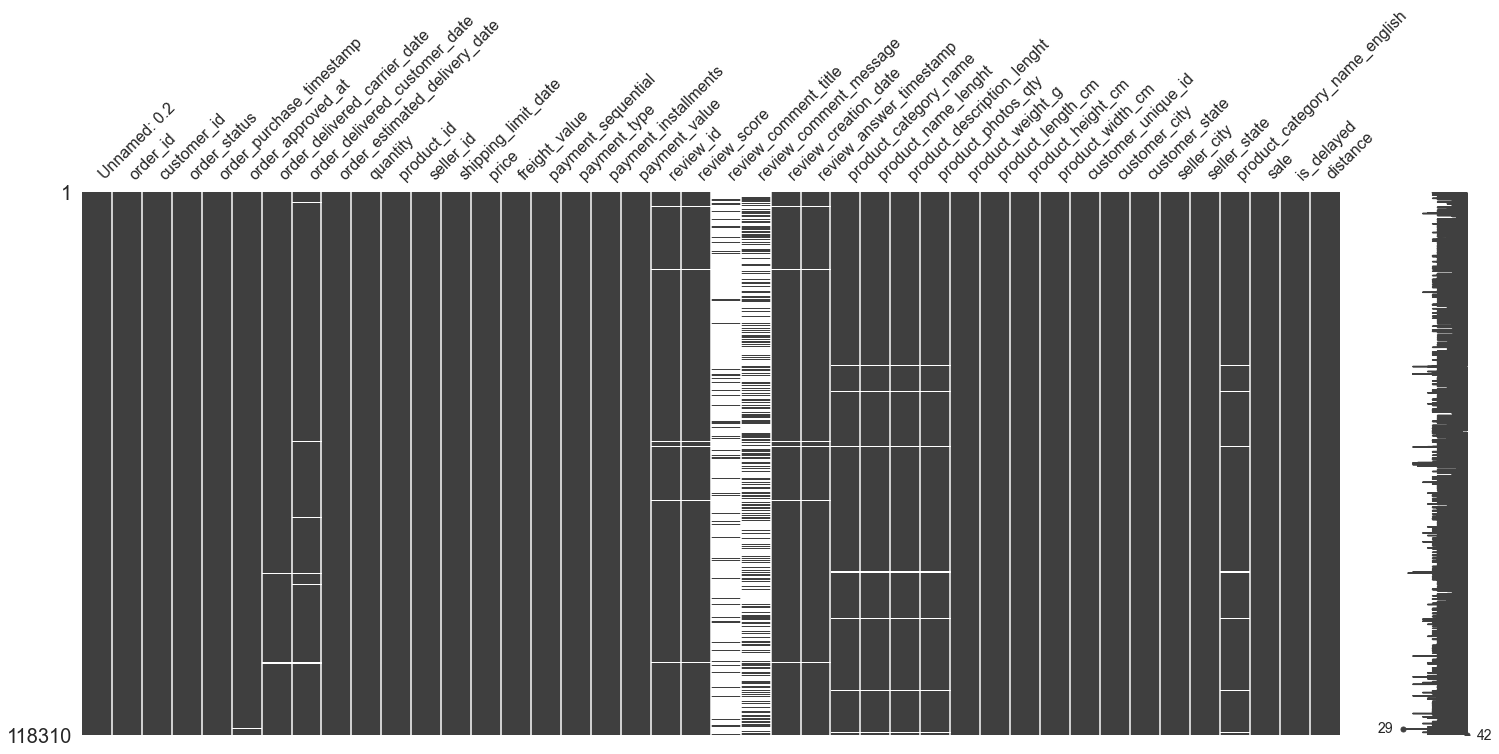

                               # of missing value % of missing value data type
review_comment_title                       104418             88.26%    object
review_comment_message                      68628             58.01%    object
order_delivered_customer_date                2588              2.19%    object
product_category_name_english                1734              1.47%    object
product_description_lenght                   1709              1.44%   float64
product_name_lenght                          1709              1.44%   float64
product_category_name                        1709              1.44%    object
product_photos_qty                           1709              1.44%   float64
order_delivered_carrier_date                 1254              1.06%    object
review_id                                     978              0.83%    object
review_answer_timestamp                       978              0.83%    object
review_creation_date                          978   

In [7]:
# checking to see the number of missing values in the data per column
df.isna().sum()
count_missing(df)

In [8]:
# finding the class distribution in our label
df['is_delayed'].value_counts()

False    109242
True       9068
Name: is_delayed, dtype: int64

The $\underline{order\_id}$, $\underline{customer\_id}$, $\underline{product\_id}$, $\underline{seller\_id}$, $\underline{review\_id}$, $\underline{customer\_unique\_id}$ are ID columns where most of the values are unique and, thus, these columns will not be able to provide the model with good insights during the training phase. Hence, it's best to do away with these ID columns.

In [9]:
df = df.drop(['order_id', 'customer_id', 'product_id', 'seller_id', 'review_id', 'customer_unique_id'], axis=1)
df

,Unnamed: 0.2,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,quantity,shipping_limit_date,price,...,product_height_cm,product_width_cm,customer_city,customer_state,seller_city,seller_state,product_category_name_english,sale,is_delayed,distance
0,0,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.00000,2017-10-06 11:07:15,29.99000,...,8.00000,13.00000,sao paulo,SP,maua,SP,housewares,29.99000,False,18.56663
1,1,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.00000,2017-10-06 11:07:15,29.99000,...,8.00000,13.00000,sao paulo,SP,maua,SP,housewares,29.99000,False,18.56663
2,2,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.00000,2017-10-06 11:07:15,29.99000,...,8.00000,13.00000,sao paulo,SP,maua,SP,housewares,29.99000,False,18.56663
3,3,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28,1.00000,2017-08-21 20:05:16,29.99000,...,8.00000,13.00000,sao paulo,SP,maua,SP,housewares,29.99000,False,15.80320
4,4,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15,1.00000,2017-08-08 18:37:31,29.99000,...,8.00000,13.00000,sao paulo,SP,maua,SP,housewares,29.99000,False,23.29956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86554,86554,delivered,2017-08-19 09:10:45,2017-08-19 09:25:11,2017-08-23 17:17:44,2017-09-04 20:43:47,2017-09-19,1.00000,2017-08-24 09:25:11,23.50000,...,19.00000,11.00000,camacari,BA,ribeirao das neves,MG,NaN,23.50000,False,995.74547
86555,86555,delivered,2017-08-19 09:10:45,2017-08-19 09:25:11,2017-08-23 17:17:44,2017-09-04 20:43:47,2017-09-19,2.00000,2017-08-24 09:25:11,23.50000,...,19.00000,11.00000,camacari,BA,ribeirao das neves,MG,NaN,47.00000,False,995.74547
86556,86556,delivered,2017-08-19 09:10:45,2017-08-19 09:25:11,2017-08-23 17:17:44,2017-09-04 20:43:47,2017-09-19,3.00000,2017-08-24 09:25:11,23.50000,...,19.00000,11.00000,camacari,BA,ribeirao das neves,MG,NaN,70.50000,False,995.74547
86661,86661,delivered,2018-04-02 21:10:31,2018-04-04 03:08:55,2018-04-11 02:32:39,2018-04-13 20:06:34,2018-04-23,1.00000,2018-04-10 03:08:55,48.00000,...,12.00000,28.00000,sao paulo,SP,curitiba,PR,NaN,48.00000,False,336.57541


As seen before, inorder to determine whether the delivery of the product is late or not (the $\underline{is\_delayed}$ label), we take the difference between $\underline{'order\_delivered\_customer\_date'}$ and $\underline{'order\_estimated\_delivery\_date'}$. Therefore, we will get rid of all the timestamps other than $\underline{'order\_purchase\_timestamp'}$.

In [10]:
df = df.drop(['order_estimated_delivery_date', 'order_delivered_customer_date', 'order_approved_at', 'order_delivered_carrier_date', 'shipping_limit_date', 'review_creation_date'], axis = 1)
df

,Unnamed: 0.2,order_status,order_purchase_timestamp,quantity,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,...,product_height_cm,product_width_cm,customer_city,customer_state,seller_city,seller_state,product_category_name_english,sale,is_delayed,distance
0,0,delivered,2017-10-02 10:56:33,1.00000,29.99000,8.72000,1.00000,credit_card,1.00000,18.12000,...,8.00000,13.00000,sao paulo,SP,maua,SP,housewares,29.99000,False,18.56663
1,1,delivered,2017-10-02 10:56:33,1.00000,29.99000,8.72000,3.00000,voucher,1.00000,2.00000,...,8.00000,13.00000,sao paulo,SP,maua,SP,housewares,29.99000,False,18.56663
2,2,delivered,2017-10-02 10:56:33,1.00000,29.99000,8.72000,2.00000,voucher,1.00000,18.59000,...,8.00000,13.00000,sao paulo,SP,maua,SP,housewares,29.99000,False,18.56663
3,3,delivered,2017-08-15 18:29:31,1.00000,29.99000,7.78000,1.00000,credit_card,3.00000,37.77000,...,8.00000,13.00000,sao paulo,SP,maua,SP,housewares,29.99000,False,15.80320
4,4,delivered,2017-08-02 18:24:47,1.00000,29.99000,7.78000,1.00000,credit_card,1.00000,37.77000,...,8.00000,13.00000,sao paulo,SP,maua,SP,housewares,29.99000,False,23.29956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86554,86554,delivered,2017-08-19 09:10:45,1.00000,23.50000,15.79000,1.00000,credit_card,1.00000,117.87000,...,19.00000,11.00000,camacari,BA,ribeirao das neves,MG,NaN,23.50000,False,995.74547
86555,86555,delivered,2017-08-19 09:10:45,2.00000,23.50000,15.79000,1.00000,credit_card,1.00000,117.87000,...,19.00000,11.00000,camacari,BA,ribeirao das neves,MG,NaN,47.00000,False,995.74547
86556,86556,delivered,2017-08-19 09:10:45,3.00000,23.50000,15.79000,1.00000,credit_card,1.00000,117.87000,...,19.00000,11.00000,camacari,BA,ribeirao das neves,MG,NaN,70.50000,False,995.74547
86661,86661,delivered,2018-04-02 21:10:31,1.00000,48.00000,17.93000,1.00000,boleto,1.00000,65.93000,...,12.00000,28.00000,sao paulo,SP,curitiba,PR,NaN,48.00000,False,336.57541


In [11]:
# parse the datetime
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'], format='%Y-%m-%d %H:%M:%S')
df['year'] = df['order_purchase_timestamp'].dt.year
df['month'] = df['order_purchase_timestamp'].dt.month
df['day'] = df['order_purchase_timestamp'].dt.day
df['daypart'] = df['order_purchase_timestamp'].dt.hour.apply(daypart)
df['order_purchase_timestamp'] = df['order_purchase_timestamp'].dt.strftime('%Y-%m-%d')
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'], format='%Y-%m-%d')
df['is_holiday'] = df['order_purchase_timestamp'].apply(is_holiday)
df = df.drop(['order_purchase_timestamp'], axis = 1)
df

,Unnamed: 0.2,order_status,quantity,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_score,...,seller_state,product_category_name_english,sale,is_delayed,distance,year,month,day,daypart,is_holiday
0,0,delivered,1.00000,29.99000,8.72000,1.00000,credit_card,1.00000,18.12000,4.00000,...,SP,housewares,29.99000,False,18.56663,2017,10,2,noon,0
1,1,delivered,1.00000,29.99000,8.72000,3.00000,voucher,1.00000,2.00000,4.00000,...,SP,housewares,29.99000,False,18.56663,2017,10,2,noon,0
2,2,delivered,1.00000,29.99000,8.72000,2.00000,voucher,1.00000,18.59000,4.00000,...,SP,housewares,29.99000,False,18.56663,2017,10,2,noon,0
3,3,delivered,1.00000,29.99000,7.78000,1.00000,credit_card,3.00000,37.77000,4.00000,...,SP,housewares,29.99000,False,15.80320,2017,8,15,evening,0
4,4,delivered,1.00000,29.99000,7.78000,1.00000,credit_card,1.00000,37.77000,5.00000,...,SP,housewares,29.99000,False,23.29956,2017,8,2,evening,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86554,86554,delivered,1.00000,23.50000,15.79000,1.00000,credit_card,1.00000,117.87000,5.00000,...,MG,NaN,23.50000,False,995.74547,2017,8,19,morning,1
86555,86555,delivered,2.00000,23.50000,15.79000,1.00000,credit_card,1.00000,117.87000,5.00000,...,MG,NaN,47.00000,False,995.74547,2017,8,19,morning,1
86556,86556,delivered,3.00000,23.50000,15.79000,1.00000,credit_card,1.00000,117.87000,5.00000,...,MG,NaN,70.50000,False,995.74547,2017,8,19,morning,1
86661,86661,delivered,1.00000,48.00000,17.93000,1.00000,boleto,1.00000,65.93000,2.00000,...,PR,NaN,48.00000,False,336.57541,2018,4,2,evening,0


In [12]:
print('{:.2f}%'.format(df['review_comment_message'].isna().sum()/len(df)*100))

58.01%


Since we have ~ 58% missing $\underline{review\_comment\_message}$ data, it doesn't make sense to impute the review comment messages since:
 1. We'll have to use NLP for this which is beyond the scope of our project.
 2. Even if we decide to use NLP, we have very little data to work with.
 3. Further, because of the aforementioned reason, we'll be feeding the model with wrong information in the form of imputed comment messages which may adversely affect the accuracy of the model.
 
Also, it does not make sense to remove the 58% of the rows with missing values since it will lead to massive information loss.
Hence, we will drop this column. Since, the other 2 columns ($\underline{'review\_comment\_title'}$ and $\underline{'review\_answer\_timestamp'}$) are also directly correlated to review_comment_message, we will be dropping them as well. Since, 'review_score' is highly correlated to the label, we will keep it as is.

In [13]:
df = df.drop(['review_comment_title', 'review_comment_message', 'review_answer_timestamp'], axis=1)
df

,Unnamed: 0.2,order_status,quantity,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_score,...,seller_state,product_category_name_english,sale,is_delayed,distance,year,month,day,daypart,is_holiday
0,0,delivered,1.00000,29.99000,8.72000,1.00000,credit_card,1.00000,18.12000,4.00000,...,SP,housewares,29.99000,False,18.56663,2017,10,2,noon,0
1,1,delivered,1.00000,29.99000,8.72000,3.00000,voucher,1.00000,2.00000,4.00000,...,SP,housewares,29.99000,False,18.56663,2017,10,2,noon,0
2,2,delivered,1.00000,29.99000,8.72000,2.00000,voucher,1.00000,18.59000,4.00000,...,SP,housewares,29.99000,False,18.56663,2017,10,2,noon,0
3,3,delivered,1.00000,29.99000,7.78000,1.00000,credit_card,3.00000,37.77000,4.00000,...,SP,housewares,29.99000,False,15.80320,2017,8,15,evening,0
4,4,delivered,1.00000,29.99000,7.78000,1.00000,credit_card,1.00000,37.77000,5.00000,...,SP,housewares,29.99000,False,23.29956,2017,8,2,evening,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86554,86554,delivered,1.00000,23.50000,15.79000,1.00000,credit_card,1.00000,117.87000,5.00000,...,MG,NaN,23.50000,False,995.74547,2017,8,19,morning,1
86555,86555,delivered,2.00000,23.50000,15.79000,1.00000,credit_card,1.00000,117.87000,5.00000,...,MG,NaN,47.00000,False,995.74547,2017,8,19,morning,1
86556,86556,delivered,3.00000,23.50000,15.79000,1.00000,credit_card,1.00000,117.87000,5.00000,...,MG,NaN,70.50000,False,995.74547,2017,8,19,morning,1
86661,86661,delivered,1.00000,48.00000,17.93000,1.00000,boleto,1.00000,65.93000,2.00000,...,PR,NaN,48.00000,False,336.57541,2018,4,2,evening,0


There is very high correlation between two columns namely 'product_category_name' and 'product_category_name_english' since they are the same thing but in two different languages. So, we will get rid of $\underline{'product\_category\_name\_english'}$.

In [14]:
df = df.drop(['product_category_name_english'], axis=1)
df

,Unnamed: 0.2,order_status,quantity,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_score,...,seller_city,seller_state,sale,is_delayed,distance,year,month,day,daypart,is_holiday
0,0,delivered,1.00000,29.99000,8.72000,1.00000,credit_card,1.00000,18.12000,4.00000,...,maua,SP,29.99000,False,18.56663,2017,10,2,noon,0
1,1,delivered,1.00000,29.99000,8.72000,3.00000,voucher,1.00000,2.00000,4.00000,...,maua,SP,29.99000,False,18.56663,2017,10,2,noon,0
2,2,delivered,1.00000,29.99000,8.72000,2.00000,voucher,1.00000,18.59000,4.00000,...,maua,SP,29.99000,False,18.56663,2017,10,2,noon,0
3,3,delivered,1.00000,29.99000,7.78000,1.00000,credit_card,3.00000,37.77000,4.00000,...,maua,SP,29.99000,False,15.80320,2017,8,15,evening,0
4,4,delivered,1.00000,29.99000,7.78000,1.00000,credit_card,1.00000,37.77000,5.00000,...,maua,SP,29.99000,False,23.29956,2017,8,2,evening,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86554,86554,delivered,1.00000,23.50000,15.79000,1.00000,credit_card,1.00000,117.87000,5.00000,...,ribeirao das neves,MG,23.50000,False,995.74547,2017,8,19,morning,1
86555,86555,delivered,2.00000,23.50000,15.79000,1.00000,credit_card,1.00000,117.87000,5.00000,...,ribeirao das neves,MG,47.00000,False,995.74547,2017,8,19,morning,1
86556,86556,delivered,3.00000,23.50000,15.79000,1.00000,credit_card,1.00000,117.87000,5.00000,...,ribeirao das neves,MG,70.50000,False,995.74547,2017,8,19,morning,1
86661,86661,delivered,1.00000,48.00000,17.93000,1.00000,boleto,1.00000,65.93000,2.00000,...,curitiba,PR,48.00000,False,336.57541,2018,4,2,evening,0


We have seen through the scatter-plots that the product dimensions don't have much impact on our label. However, product delays could be attributed to the volume of the package. Bulkier the package, its transportation time may be expected to be large. For this reason, we're calculating the volume of the package and storing it as another attribute in the dataframe to give our model additional data to work with. We'll let the model decide which features are important in the training phase.

In [15]:
# calculating the volume of the product using the formula [Volume of cuboid = length*width*height]
df['product_volume_cm'] = df['product_length_cm'] * df['product_height_cm'] * df['product_width_cm']
df = df.drop(['product_length_cm', 'product_height_cm', 'product_width_cm'], axis = 1)
df

,Unnamed: 0.2,order_status,quantity,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_score,...,seller_state,sale,is_delayed,distance,year,month,day,daypart,is_holiday,product_volume_cm
0,0,delivered,1.00000,29.99000,8.72000,1.00000,credit_card,1.00000,18.12000,4.00000,...,SP,29.99000,False,18.56663,2017,10,2,noon,0,1976.00000
1,1,delivered,1.00000,29.99000,8.72000,3.00000,voucher,1.00000,2.00000,4.00000,...,SP,29.99000,False,18.56663,2017,10,2,noon,0,1976.00000
2,2,delivered,1.00000,29.99000,8.72000,2.00000,voucher,1.00000,18.59000,4.00000,...,SP,29.99000,False,18.56663,2017,10,2,noon,0,1976.00000
3,3,delivered,1.00000,29.99000,7.78000,1.00000,credit_card,3.00000,37.77000,4.00000,...,SP,29.99000,False,15.80320,2017,8,15,evening,0,1976.00000
4,4,delivered,1.00000,29.99000,7.78000,1.00000,credit_card,1.00000,37.77000,5.00000,...,SP,29.99000,False,23.29956,2017,8,2,evening,0,1976.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86554,86554,delivered,1.00000,23.50000,15.79000,1.00000,credit_card,1.00000,117.87000,5.00000,...,MG,23.50000,False,995.74547,2017,8,19,morning,1,3344.00000
86555,86555,delivered,2.00000,23.50000,15.79000,1.00000,credit_card,1.00000,117.87000,5.00000,...,MG,47.00000,False,995.74547,2017,8,19,morning,1,3344.00000
86556,86556,delivered,3.00000,23.50000,15.79000,1.00000,credit_card,1.00000,117.87000,5.00000,...,MG,70.50000,False,995.74547,2017,8,19,morning,1,3344.00000
86661,86661,delivered,1.00000,48.00000,17.93000,1.00000,boleto,1.00000,65.93000,2.00000,...,PR,48.00000,False,336.57541,2018,4,2,evening,0,9408.00000


Since there are very few missing values for all attributes (maximum being 3240 for order_delivered_customer_date), we'll drop these rows. Dropping such a miniscule number of rows will have negligible effect on the quality of the data or our predictions.

In [16]:
# dropping remaining missing values from the dataframe
df = df.dropna()
df

,Unnamed: 0.2,order_status,quantity,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_score,...,seller_state,sale,is_delayed,distance,year,month,day,daypart,is_holiday,product_volume_cm
0,0,delivered,1.00000,29.99000,8.72000,1.00000,credit_card,1.00000,18.12000,4.00000,...,SP,29.99000,False,18.56663,2017,10,2,noon,0,1976.00000
1,1,delivered,1.00000,29.99000,8.72000,3.00000,voucher,1.00000,2.00000,4.00000,...,SP,29.99000,False,18.56663,2017,10,2,noon,0,1976.00000
2,2,delivered,1.00000,29.99000,8.72000,2.00000,voucher,1.00000,18.59000,4.00000,...,SP,29.99000,False,18.56663,2017,10,2,noon,0,1976.00000
3,3,delivered,1.00000,29.99000,7.78000,1.00000,credit_card,3.00000,37.77000,4.00000,...,SP,29.99000,False,15.80320,2017,8,15,evening,0,1976.00000
4,4,delivered,1.00000,29.99000,7.78000,1.00000,credit_card,1.00000,37.77000,5.00000,...,SP,29.99000,False,23.29956,2017,8,2,evening,0,1976.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58067,58067,delivered,1.00000,334.99000,24.92000,1.00000,credit_card,6.00000,359.91000,5.00000,...,MG,334.99000,False,715.13760,2018,5,12,morning,1,29792.00000
58145,58145,delivered,1.00000,87.90000,17.55000,1.00000,credit_card,10.00000,105.45000,5.00000,...,RJ,87.90000,False,932.69560,2018,8,6,midnight,0,4320.00000
113151,113151,delivered,1.00000,199.99000,19.28000,1.00000,credit_card,1.00000,219.27000,5.00000,...,SP,199.99000,False,534.17156,2018,4,24,morning,0,31280.00000
94397,94397,delivered,1.00000,19.45000,15.56000,1.00000,credit_card,7.00000,70.02000,5.00000,...,SP,19.45000,False,552.76082,2017,4,11,midnight,0,2418.00000


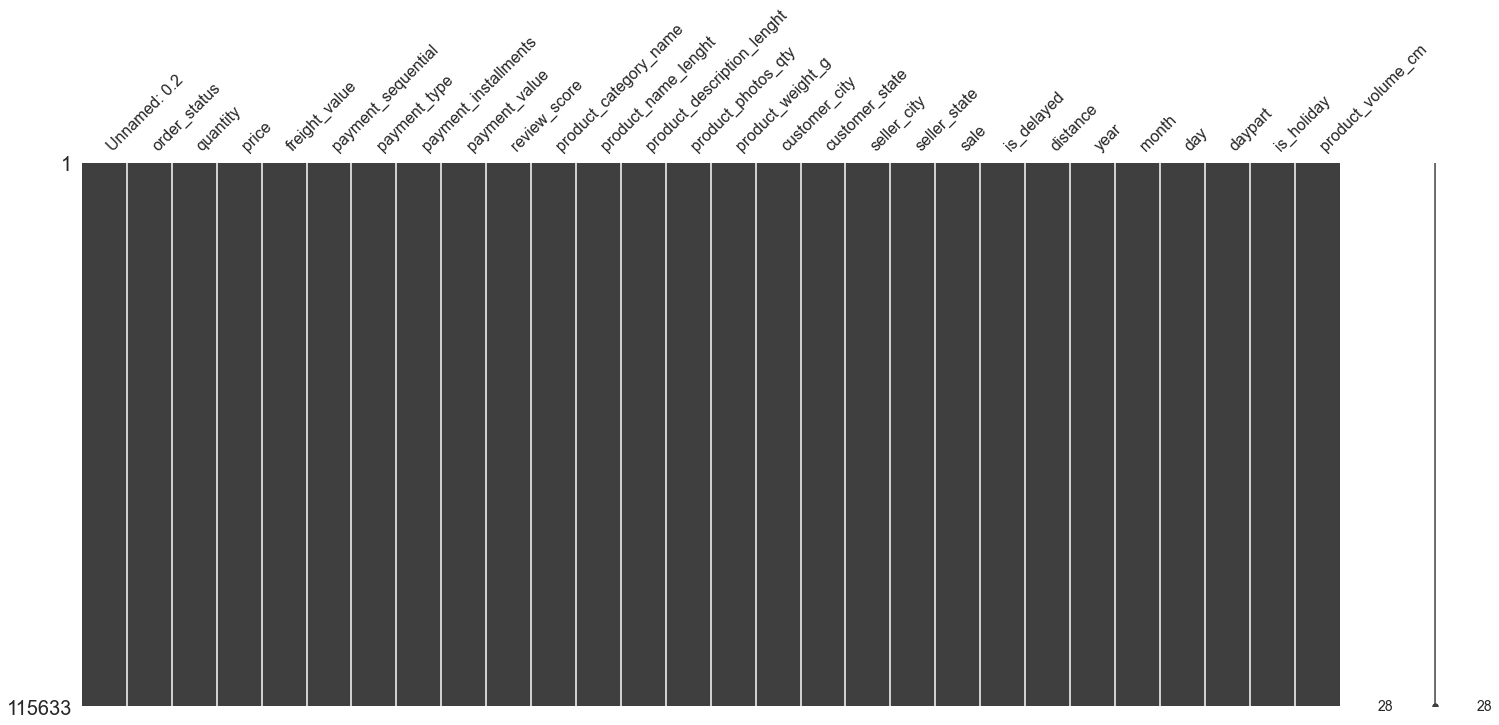

                            # of missing value % of missing value data type
Unnamed: 0.2                                 0              0.00%     int64
order_status                                 0              0.00%    object
is_holiday                                   0              0.00%     int64
daypart                                      0              0.00%    object
day                                          0              0.00%     int64
month                                        0              0.00%     int64
year                                         0              0.00%     int64
distance                                     0              0.00%   float64
is_delayed                                   0              0.00%      bool
sale                                         0              0.00%   float64
seller_state                                 0              0.00%    object
seller_city                                  0              0.00%    object
customer_sta

In [17]:
# dertermining if there are any missing values still left
df.isna().sum()
count_missing(df)

In [18]:
# storing the cleaned dataset
df.to_csv('../Dataset/brazilian_ecommerce_cleaned.csv', index=False)